## Automação de Tarefas

### Problema a ser resolvido    

- Buscar automaticamente os dados das ações no site do Yahoo!
- Analisar os dados das ações de acordo com a solicitação do gestor
- Enviar um email com todas análises de forma automática

### Importando bibliotecas

In [51]:
import yfinance
import pyautogui
import pyperclip
import time

### Passo 1 - Buscar automaticamente os dados das ações no site do Yahoo!   

<Axes: xlabel='Date'>

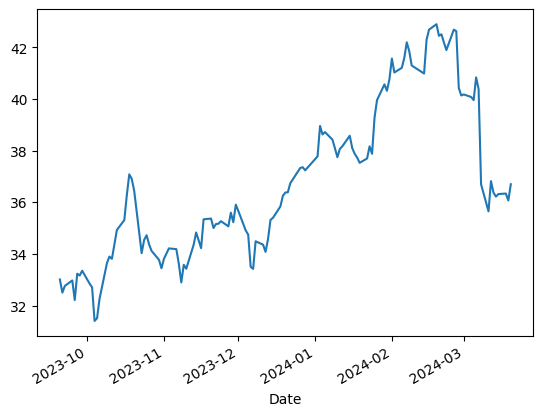

In [15]:
codigo = input("Digite o código da ação desejada: ")
dados = yfinance.Ticker(codigo).history("6mo")

fechamento = dados.Close
fechamento.plot()

### Passo 2 - Análises solicitadas pelo Gestor

- Análise dos ultimos 6 meses
- Cotação máxima
- Cotação mínima
- Cotação atual

In [40]:
# Cotação máxima
cotacaoMax = fechamento.max()

# Cotação mínima
cotacaoMin = fechamento.min()

# Cotação atual
cotacaoAtual = fechamento.iloc[-1]

### Passo 3 - Automatizando o envio de email

- Abrir o navegador
- Digitar o endereço do seu webmail
- Acessar a aba de escrever email
- Preencher destinatário
- Direcionar para o assunto e preenche-lo
- Direcionar para o corpo e preenche-lo
- Enviar o email

In [67]:
# Configurando uma pausa entre os passos
pyautogui.PAUSE = 0.5

# Abrindo o navegador
pyautogui.hotkey("win")
pyautogui.write("brave")
pyautogui.hotkey("enter")

# Digitando o endereco do meu webmail
pyperclip.copy("www.gmail.com")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("enter")

# Tempo de espera para carregar a página
time.sleep(3)

# Acessando a aba de escrever email
pyautogui.click(x=64, y=180)

# Preenchendo destinatário
pyperclip.copy("email@email.com")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Preenchendo o assunto
pyperclip.copy("Análises diárias")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Preenchendo corpo
mensagem = f"""
Prezado Gestor, 

Seguem as análises dos últimos seis meses da ação {codigo} conforme solicitado

Cotação máxima: R$ {round(cotacaoMax, 2)}
Cotação mínima: R$ {round(cotacaoMin, 2)}
Cotação atual: R$ {round(cotacaoAtual, 2)}

Qualquer dúvida, estou à disposição!

Atte.
"""
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Enviando o email
pyautogui.click(x=1952, y=998)
